# MATH 210 Introduction to Mathematical Computing

## March 12, 2018

* Linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
%matplotlib inline

## Linear regression

Let's make some fake data:

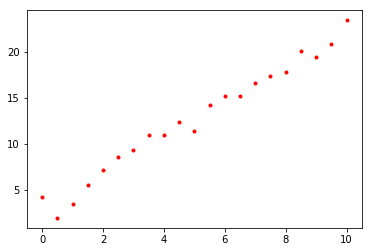

In [2]:
N = 20; a = 2; b = 3
x = np.linspace(0,10,N+1)
noise = np.random.randn(N+1)
y = a*x + b + noise
plt.plot(x,y,'r.')
plt.show()

Let's use [linear regression](https://en.wikipedia.org/wiki/Linear_regression) to fit a line to our data...

The general idea of linear regression is, given a set of $N+1$ data points $\{ (x_0,y_0),(x_1,y_1),\dots,(x_N,y_N) \}$, we want find coefficients $\alpha_0$ and $\alpha_1$ such that the linear model

$$
y = \alpha_0 + \alpha_1 x
$$

best fits the data by minimizing the sum of square errors:

$$
SSE = \sum_{k=0}^N (y_k - (\alpha_0 + \alpha_1 x_k))^2
$$

If we introduce matrices $X$, $Y$ and $A$ where

$$
X = \begin{bmatrix} 1 & x_0 \\ 1 & x_1 \\ \vdots & \vdots \\
1 & x_N \end{bmatrix}
 \ \ 
Y = \begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_N \end{bmatrix}
\ \
A = \begin{bmatrix} \alpha_0 \\ \alpha_1 \end{bmatrix}
$$
then
$$
SSE = \| XA - Y \|^2
$$

We need to find $A$ such that distance from $XA$ to $Y$ is minimal! The answer $A$ is the solution the equation:

$$
(X^T X)A = X^TY
$$

In [3]:
X = np.column_stack([np.ones(N+1),x])
Y = y.reshape(N+1,1)

In [4]:
A = la.solve(X.T @ X,X.T @ Y)

In [5]:
A

array([[ 2.87422598],
       [ 1.95681234]])

In [6]:
y_model = A[0,0] + A[1,0]*x

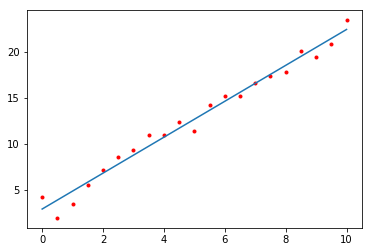

In [7]:
plt.plot(x,y,'r.',x,y_model);

Success!

We can do the same to fit a higher degree polynomial to data. In other wordsm we can fit the model of degree $d$:

$$
y = a_0 + a_1x + \cdots + a_dx^d
$$

If we introduce matrices $X$, $Y$ and $A$ where

$$
X = \begin{bmatrix}
1 & x_0 & x_0^2 & \dots & x_0^d \\
1 & x_1 & x_1^2 & \dots & x_1^d \\
\vdots & & & & \vdots \\
1 & x_N & x_N^2 & \dots & x_N^d \\
\end{bmatrix}
 \ \ 
Y = \begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_N \end{bmatrix}
\ \
A = \begin{bmatrix} a_0 \\ a_1 \\ \dots \\ a_d \end{bmatrix}
$$
then
$$
SSE = \| XA - Y \|^2
$$

The answer $A$ is the solution the equation:

$$
(X^T X)A = X^TY
$$

Let's make some fake data:

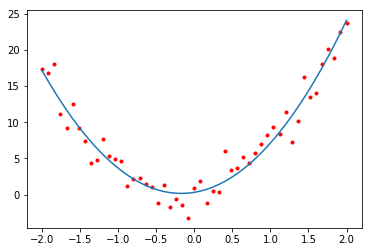

In [8]:
N = 50; a_0 = 1; a_1 = 2; a_2 = 5;
x = np.linspace(-2,2,N+1)
noise = 2*np.random.randn(N+1)
y = a_0 + a_1*x + a_2*x**2 + noise

X = np.column_stack([np.ones(N+1),x,x**2])
Y = y.reshape(N+1,1)

A = la.solve(X.T @ X, X.T @ Y)

y_model = A[0,0] + A[1,0]*x + A[2,0]*x**2

plt.plot(x,y,'r.',x,y_model);